# Project 1 Code

# Cleaning Influenza (with population) data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [88]:
#create path to csv file:
influenza_path= path('Resources\flu_gdp_pop_summary_final.csv')


In [89]:
influenza_df=pd.read_csv(influenza_path)


In [90]:
#Clean influenza file
influenza_df


,Country Code,Country Name,Year,Cases,GDP,Population,Cases (per million people),"Population / 1,000,000"
0,ABW,Aruba,2017,52,3.092179e+09,105439,493,0.105439
1,ABW,Aruba,2018,62,3.276188e+09,105962,585,0.105962
2,ABW,Aruba,2019,166,3.395794e+09,106442,1560,0.106442
3,ABW,Aruba,2020,101,2.610039e+09,106585,948,0.106585
4,ABW,Aruba,2021,0,3.126019e+09,106537,0,0.106537
...,...,...,...,...,...,...,...,...
769,ZMB,Zambia,2020,30,1.811064e+10,18927715,2,18.927715
770,ZMB,Zambia,2021,275,2.214765e+10,19473125,14,19.473125
771,ZMB,Zambia,2022,347,2.978445e+10,20017675,17,20.017675
772,ZWE,Zimbabwe,2021,6,2.837124e+10,15993524,0,15.993524


In [91]:
keep_colunms= ['Country Code', 'Country Name', 'Year','Cases (per million people)']
influenza_df= influenza_df[keep_colunms]


In [92]:
influenza_df

,Country Code,Country Name,Year,Cases (per million people)
0,ABW,Aruba,2017,493
1,ABW,Aruba,2018,585
2,ABW,Aruba,2019,1560
3,ABW,Aruba,2020,948
4,ABW,Aruba,2021,0
...,...,...,...,...
769,ZMB,Zambia,2020,2
770,ZMB,Zambia,2021,14
771,ZMB,Zambia,2022,17
772,ZWE,Zimbabwe,2021,0


In [93]:
# Rename some columns for merging later
new_columns = {
    
    'Cases (per million people)': 'Influenza Cases'
}

influenza_df = influenza_df.rename(columns=new_columns)
influenza_df.head()


,Country Code,Country Name,Year,Influenza Cases
0,ABW,Aruba,2017,493
1,ABW,Aruba,2018,585
2,ABW,Aruba,2019,1560
3,ABW,Aruba,2020,948
4,ABW,Aruba,2021,0


In [94]:
influenza_df = influenza_df.dropna()
influenza_df= influenza_df.reset_index(drop=True)
influenza_df.head(10)

,Country Code,Country Name,Year,Influenza Cases
0,ABW,Aruba,2017,493
1,ABW,Aruba,2018,585
2,ABW,Aruba,2019,1560
3,ABW,Aruba,2020,948
4,ABW,Aruba,2021,0
5,AFG,Afghanistan,2017,3
6,AFG,Afghanistan,2018,5
7,AFG,Afghanistan,2019,7
8,AFG,Afghanistan,2020,3
9,AFG,Afghanistan,2021,3


In [95]:
# Write the new data to a CSV file
output_file_path= path('Resources\influenza_population cleaned.csv') 
influenza_df.to_csv(output_file_path, index=False)

# Merge Influenza data with Capital Health Expanditure and Hygiene data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

## Import Capital Health Expanditure data and Hygiene Data

In [96]:
#create path to csv file:
expenditure_path= path('Resources\Capital Health Expenditure cleaned.csv')

hygiene_path= path('Resources\hygiene cleaned.csv')

expenditure_df=pd.read_csv(expenditure_path)

hygiene_df=pd.read_csv(hygiene_path)

expenditure_df.head()

,Country Code,Country Name,Year,Capital Health Expenditure
0,AFG,Afghanistan,2017,0.285928
1,AFG,Afghanistan,2018,0.367229
2,AFG,Afghanistan,2019,0.314067
3,AFG,Afghanistan,2020,0.419342
4,AFG,Afghanistan,2021,0.415686


In [97]:
influenza_df.head()

,Country Code,Country Name,Year,Influenza Cases
0,ABW,Aruba,2017,493
1,ABW,Aruba,2018,585
2,ABW,Aruba,2019,1560
3,ABW,Aruba,2020,948
4,ABW,Aruba,2021,0


Merge Influenza and Capital Health Expenditure



In [98]:
influ_Capital_merged=influenza_df.merge(expenditure_df, how='left')
influ_Capital_merged.head()

,Country Code,Country Name,Year,Influenza Cases,Capital Health Expenditure
0,ABW,Aruba,2017,493,NaN
1,ABW,Aruba,2018,585,NaN
2,ABW,Aruba,2019,1560,NaN
3,ABW,Aruba,2020,948,NaN
4,ABW,Aruba,2021,0,NaN


In [99]:
#Drop missing value in merged file
IC_merged=influ_Capital_merged.dropna()
IC_merged.head()

,Country Code,Country Name,Year,Influenza Cases,Capital Health Expenditure
5,AFG,Afghanistan,2017,3,0.285928
6,AFG,Afghanistan,2018,5,0.367229
7,AFG,Afghanistan,2019,7,0.314067
8,AFG,Afghanistan,2020,3,0.419342
9,AFG,Afghanistan,2021,3,0.415686


Export merged file between Influenza Cases and  Capital Health Expenditure to csv file namely IC_merged.csv

In [100]:
IC_merged_path= path('Resources\IC_merged1.csv')
IC_merged.to_csv(IC_merged_path, index=False)

Merge Influenza and Hygiene(People with handwashing facilities)

In [101]:
#Merge Influenza and People with Handwashing Facilities

influ_Hygiene_merged=influenza_df.merge(hygiene_df, how='left')
influ_Hygiene_merged

,Country Code,Country Name,Year,Influenza Cases,People With Handwashing Facilities
0,ABW,Aruba,2017,493,NaN
1,ABW,Aruba,2018,585,NaN
2,ABW,Aruba,2019,1560,NaN
3,ABW,Aruba,2020,948,NaN
4,ABW,Aruba,2021,0,NaN
...,...,...,...,...,...
769,ZMB,Zambia,2020,2,17.933927
770,ZMB,Zambia,2021,14,NaN
771,ZMB,Zambia,2022,17,NaN
772,ZWE,Zimbabwe,2021,0,NaN


In [102]:
#Drop missing value in merged file
IH_merged=influ_Hygiene_merged.dropna()
IH_merged.head()

,Country Code,Country Name,Year,Influenza Cases,People With Handwashing Facilities
5,AFG,Afghanistan,2017,3,37.847132
6,AFG,Afghanistan,2018,5,37.931720
7,AFG,Afghanistan,2019,7,38.021140
8,AFG,Afghanistan,2020,3,38.115050
25,ARM,Armenia,2017,69,94.042941


In [103]:
#Export to csv file namely IC_merged.csv
IH_merged_path= path('Resources\IH_merged1.csv')
IH_merged.to_csv(IH_merged_path, index=False)

# Relationship betwwen Influenza Cases and Capital Health Expenditure

In [104]:
#create path to csv file:

IC_merged_path= path('Resources\IC_merged1.csv')

IC_merged=pd.read_csv(IC_merged_path)

IC_merged.head()

,Country Code,Country Name,Year,Influenza Cases,Capital Health Expenditure
0,AFG,Afghanistan,2017,3,0.285928
1,AFG,Afghanistan,2018,5,0.367229
2,AFG,Afghanistan,2019,7,0.314067
3,AFG,Afghanistan,2020,3,0.419342
4,AFG,Afghanistan,2021,3,0.415686


In [105]:
# Extract the columns of interest
# Extract the columns of interest
influenza_cases = IC_merged['Influenza Cases']
health_expenditure = IC_merged['Capital Health Expenditure']

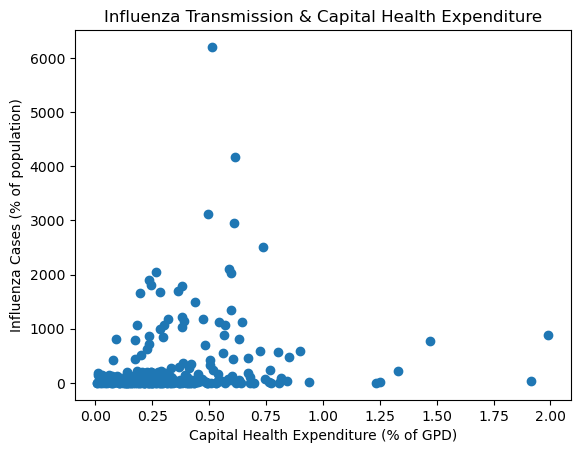

<Figure size 640x480 with 0 Axes>

In [106]:
#SCATTER PLOT WITH TREND LINE BEFORE REMOVING OUTLINER

plt.scatter(health_expenditure, influenza_cases)

# Set the axis labels
plt.xlabel('Capital Health Expenditure (% of GPD)')
plt.ylabel('Influenza Cases (% of population)')

# Set the title
plt.title('Influenza Transmission & Capital Health Expenditure')

# Display the plot
plt.show()
plt.tight_layout()

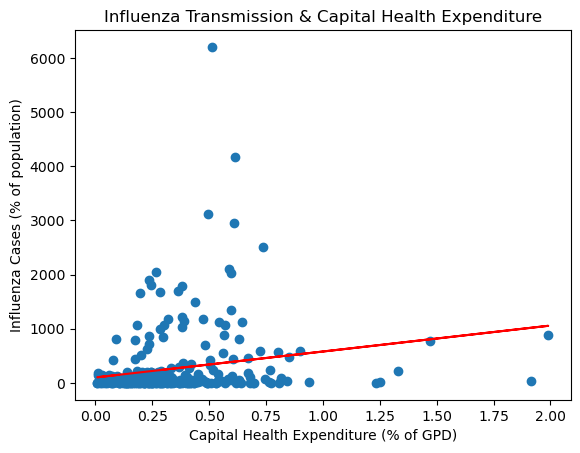

In [107]:
#SCATTER PLOT WITH TREND LINE BEFORE REMOVING OUTLINER WITH TREND LINE
# Calculate the trend line using numpy's polyfit function
slope, intercept = np.polyfit(health_expenditure, influenza_cases, 1)
trend_line = slope * health_expenditure + intercept

# Create the scatter plot
plt.scatter(health_expenditure, influenza_cases)

# Plot the trend line
plt.plot(health_expenditure, trend_line, color='red')

# Set the axis labels
plt.xlabel('Capital Health Expenditure (% of GPD)')
plt.ylabel('Influenza Cases (% of population)')
# Set the title
plt.title('Influenza Transmission & Capital Health Expenditure')
# Save the scatter plot as an image
plt.savefig('scatter_IC with outliner.png')
# Display the plot
plt.show()

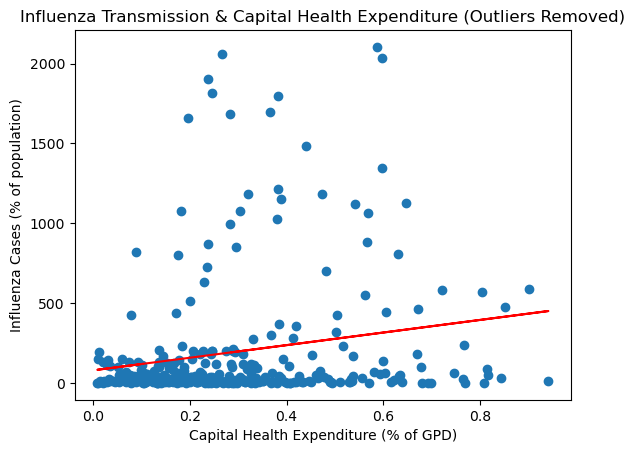

In [108]:
#SCATTER PLOT WITH TREND LINE AFTER REMOVING OUTLINER

# Calculate z-scores for each column
z_scores_cases = np.abs(stats.zscore(influenza_cases))
z_scores_expenditure = np.abs(stats.zscore(health_expenditure))

# Set a threshold value (e.g., 3) for z-score to identify outliers
threshold = 3

# Filter out rows where either of the columns has a z-score higher than the threshold
filtered_cases = influenza_cases[(z_scores_cases < threshold) & (z_scores_expenditure < threshold)]
filtered_expenditure = health_expenditure[(z_scores_cases < threshold) & (z_scores_expenditure < threshold)]

# Calculate the trend line using numpy's polyfit function on the filtered data
slope, intercept = np.polyfit(filtered_expenditure, filtered_cases, 1)
trend_line = slope * filtered_expenditure + intercept

# Create the scatter plot with filtered data
plt.scatter(filtered_expenditure, filtered_cases)

# Plot the trend line
plt.plot(filtered_expenditure, trend_line, color='red')

# Set the axis labels
plt.xlabel('Capital Health Expenditure (% of GPD)')
plt.ylabel('Influenza Cases (% of population)')
# Set the title
plt.title('Influenza Transmission & Capital Health Expenditure (Outliers Removed)')

# Save the scatter plot as an image
plt.savefig('scatter_IC outliner removed.png')
# Display the plot
plt.show()


In [109]:
#CORRELATION 
# Calculate the correlation using pandas corr() function
correlation = influenza_cases.corr(health_expenditure)

# Print the correlation value
print("Correlation between Influenza Cases and Capital Health Expenditure:", correlation)


Correlation between Influenza Cases and Capital Health Expenditure: 0.2038024527850968


In [110]:
#COVARIANCE
# Calculate the covariance using pandas cov() function
covariance = influenza_cases.cov(health_expenditure)

# Print the covariance value
print("Covariance between Influenza Cases and Capital Health Expenditure:", covariance)

Covariance between Influenza Cases and Capital Health Expenditure: 34.12579573414082


In [111]:
#Rungression between Influenza Cases and Capital Health Expenditure

# Add a constant term to the independent variable
X = sm.add_constant(health_expenditure)

# Create and fit the linear regression model
model = sm.OLS(influenza_cases, X)
results = model.fit()

# Save the regression result as an image
plt.savefig('IC regression result.png')

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Influenza Cases   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     13.30
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           0.000311
Time:                        20:52:24   Log-Likelihood:                -2421.9
No. Observations:                 309   AIC:                             4848.
Df Residuals:                     307   BIC:                             4855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<Figure size 640x480 with 0 Axes>

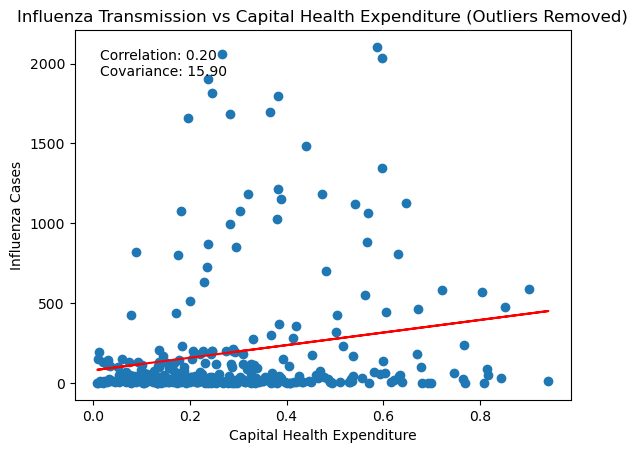

In [112]:
# Calculate z-scores for each column
z_scores_cases = np.abs(stats.zscore(influenza_cases))
z_scores_expenditure = np.abs(stats.zscore(health_expenditure))

# Set a threshold value (e.g., 3) for z-score to identify outliers
threshold = 3

# Filter out rows where either of the columns has a z-score higher than the threshold
filtered_cases = influenza_cases[(z_scores_cases < threshold) & (z_scores_expenditure < threshold)]
filtered_expenditure = health_expenditure[(z_scores_cases < threshold) & (z_scores_expenditure < threshold)]

# Calculate the trend line using numpy's polyfit function on the filtered data
slope, intercept = np.polyfit(filtered_expenditure, filtered_cases, 1)
trend_line = slope * filtered_expenditure + intercept

# Calculate correlation and covariance
correlation = np.corrcoef(filtered_expenditure, filtered_cases)[0, 1]
covariance = np.cov(filtered_expenditure, filtered_cases)[0, 1]

# Create the scatter plot with filtered data
plt.scatter(filtered_expenditure, filtered_cases)

# Plot the trend line
plt.plot(filtered_expenditure, trend_line, color='red')

# Set the axis labels
plt.xlabel('Capital Health Expenditure')
plt.ylabel('Influenza Cases')

# Set the title
plt.title('Influenza Transmission vs Capital Health Expenditure (Outliers Removed)')

# Add correlation and covariance as text annotations
text = f'Correlation: {correlation:.2f}\nCovariance: {covariance:.2f}'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top')

# Save the scatter plot as an image
plt.savefig('scatter_IC outliner removed with other corr and covar.png')

# Display the plot
plt.show()


# Relationship betwwen Influenza Cases and Hygiene

In [113]:
#create path to csv file:

IH_merged_path= path('Resources\IH_merged1.csv')

IH_merged=pd.read_csv(IH_merged_path)

IH_merged.head()

,Country Code,Country Name,Year,Influenza Cases,People With Handwashing Facilities
0,AFG,Afghanistan,2017,3,37.847132
1,AFG,Afghanistan,2018,5,37.931720
2,AFG,Afghanistan,2019,7,38.021140
3,AFG,Afghanistan,2020,3,38.115050
4,ARM,Armenia,2017,69,94.042941


In [114]:
# Extract the columns of interest
influenza_cases = IH_merged['Influenza Cases']
Hygiene = IH_merged['People With Handwashing Facilities']

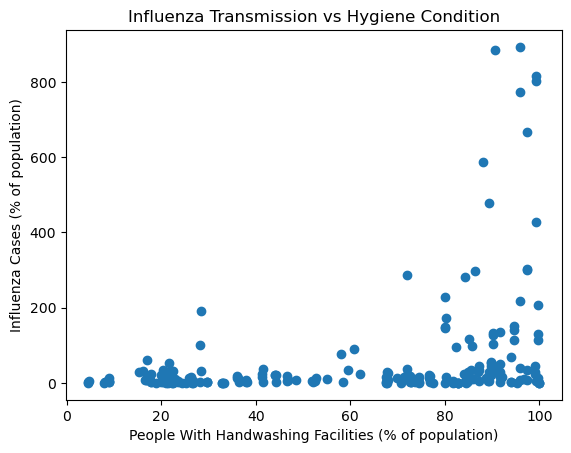

In [115]:
# Create the scatter plot with outliner
plt.scatter(Hygiene, influenza_cases)

# Set the axis labels
plt.xlabel('People With Handwashing Facilities (% of population)')
plt.ylabel('Influenza Cases (% of population)')

# Set the title
plt.title('Influenza Transmission vs Hygiene Condition')

# Display the plot
plt.show()

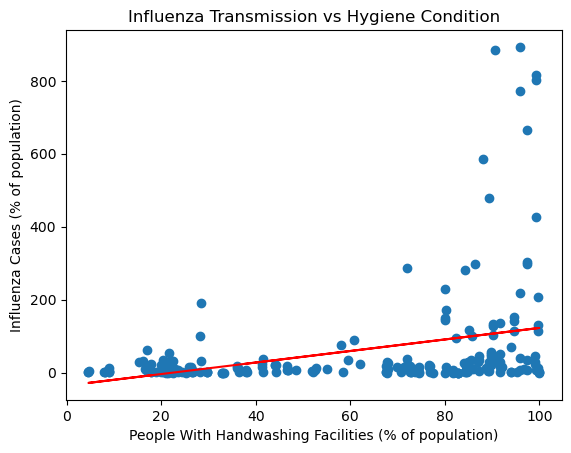

In [116]:
#SCATTER PLOT WITH TREND LINE BEFORE REMOVING OUTLINER- WITH TREND LINE
# Calculate the trend line using numpy's polyfit function
slope, intercept = np.polyfit(Hygiene, influenza_cases, 1)
trend_line = slope * Hygiene + intercept

# Create the scatter plot
plt.scatter(Hygiene, influenza_cases)

# Plot the trend line
plt.plot(Hygiene, trend_line, color='red')

# Set the axis labels
plt.xlabel('People With Handwashing Facilities (% of population)')
plt.ylabel('Influenza Cases (% of population)')

# Set the title
plt.title('Influenza Transmission vs Hygiene Condition')

# Save the scatter plot as an image
plt.savefig('scatter_IH with outliner.png')

# Display the plot
plt.show()



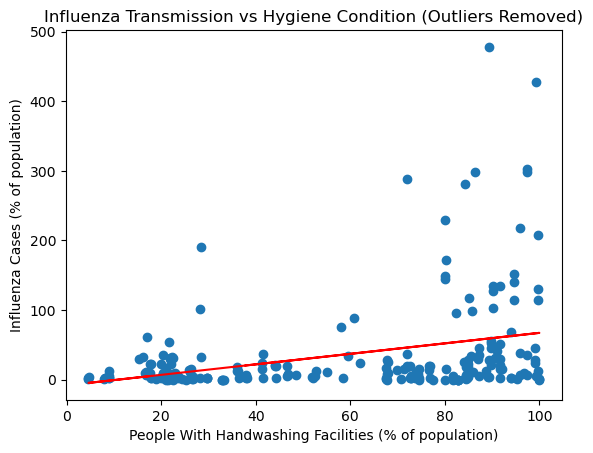

In [117]:
#SCATTER PLOT WITH TREND LINE AFTER REMOVING OUTLINER

# Calculate z-scores for each column
z_scores_cases = np.abs(stats.zscore(influenza_cases))
z_scores_hygiene = np.abs(stats.zscore(Hygiene))

# Set a threshold value (e.g., 3) for z-score to identify outliers
threshold = 3

# Filter out rows where either of the columns has a z-score higher than the threshold
filtered_cases = influenza_cases[(z_scores_cases < threshold) & (z_scores_hygiene < threshold)]
filtered_hygiene = Hygiene[(z_scores_cases < threshold) & (z_scores_hygiene < threshold)]

# Calculate the trend line using numpy's polyfit function on the filtered data
slope, intercept = np.polyfit(filtered_hygiene, filtered_cases, 1)
trend_line = slope * filtered_hygiene + intercept

# Create the scatter plot with filtered data
plt.scatter(filtered_hygiene, filtered_cases)

# Plot the trend line
plt.plot(filtered_hygiene, trend_line, color='red')

# Set the axis labels
plt.xlabel('People With Handwashing Facilities (% of population)')
plt.ylabel('Influenza Cases (% of population)')

# Set the title
plt.title('Influenza Transmission vs Hygiene Condition (Outliers Removed)')

# Save the scatter plot as an image
plt.savefig('scatter_IH outliner removed.png')

# Display the plot
plt.show()



In [118]:
#CORRELATION 
# Calculate the correlation using pandas corr() function
correlation1 = influenza_cases.corr(Hygiene)

# Print the correlation value
print("Correlation between Influenza Cases and People With Handwashing Facilities:", correlation1)


Correlation between Influenza Cases and People With Handwashing Facilities: 0.33127760276808804


In [119]:
#COVARIANCE
# Calculate the covariance using pandas cov() function
covariance1 = influenza_cases.cov(Hygiene)

# Print the covariance value
print("Covariance between Influenza Cases and People With Handwashing Facilitiese:", covariance1)

Covariance between Influenza Cases and People With Handwashing Facilitiese: 1499.8650395381112


In [121]:
#Rungression between Influenza Cases and Capital Health Expenditure

# Add a constant term to the independent variable
X = sm.add_constant(Hygiene)

# Create and fit the linear regression model
model = sm.OLS(influenza_cases, X)
results = model.fit()

# Save the regression result as an image
plt.savefig('IH regression result.png')

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Influenza Cases   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     27.61
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.45e-07
Time:                        20:53:43   Log-Likelihood:                -1434.8
No. Observations:                 226   AIC:                             2874.
Df Residuals:                     224   BIC:                             2881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

<Figure size 640x480 with 0 Axes>

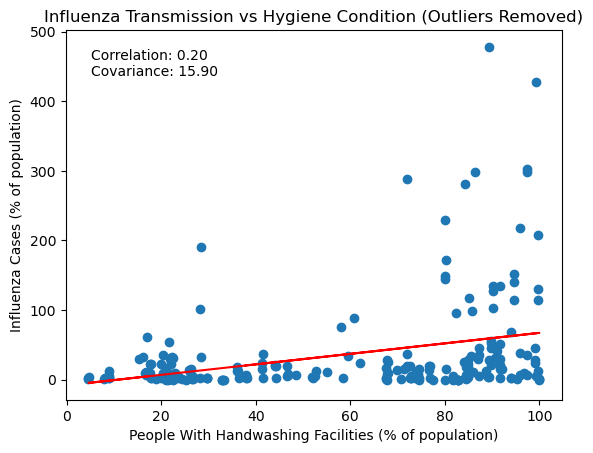

In [122]:
#SCATTER PLOT WITH TREND LINE AFTER REMOVING OUTLINER

# Calculate z-scores for each column
z_scores_cases = np.abs(stats.zscore(influenza_cases))
z_scores_hygiene = np.abs(stats.zscore(Hygiene))

# Set a threshold value (e.g., 3) for z-score to identify outliers
threshold = 3

# Filter out rows where either of the columns has a z-score higher than the threshold
filtered_cases = influenza_cases[(z_scores_cases < threshold) & (z_scores_hygiene < threshold)]
filtered_hygiene = Hygiene[(z_scores_cases < threshold) & (z_scores_hygiene < threshold)]

# Calculate the trend line using numpy's polyfit function on the filtered data
slope, intercept = np.polyfit(filtered_hygiene, filtered_cases, 1)
trend_line = slope * filtered_hygiene + intercept

# Create the scatter plot with filtered data
plt.scatter(filtered_hygiene, filtered_cases)

# Plot the trend line
plt.plot(filtered_hygiene, trend_line, color='red')

# Add correlation and covariance as text annotations
text = f'Correlation: {correlation:.2f}\nCovariance: {covariance:.2f}'
plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top')

# Set the axis labels
plt.xlabel('People With Handwashing Facilities (% of population)')
plt.ylabel('Influenza Cases (% of population)')

# Set the title
plt.title('Influenza Transmission vs Hygiene Condition (Outliers Removed)')

# Save the scatter plot as an image
plt.savefig('scatter_IH outliner removed with corr.png')

# Display the plot
plt.show()

